# Exploratory data analysis and price prediction of mobile phones

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
BASE_PATH = "./used_device_data.csv"

df = pd.read_csv(BASE_PATH)
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [3]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [4]:
# get columns
cols = df.select_dtypes(include='object').columns

In [5]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [6]:
df = df.dropna()

# drop the label
X = df.drop('normalized_new_price', axis=1)
print(X.columns)
# drop all non-numeric columns 
X = df.drop(['device_brand', 'os', '4g', '5g'], axis=1)
print(X.columns)
y = df['normalized_new_price']
print(X.shape)
print(y.shape)

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price'],
      dtype='object')
Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price'],
      dtype='object')
(3253, 11)
(3253,)


## Visualizing data

In [7]:
# Exploratory data analysis
# visualize the median prices of all brands, os's, 4g devices and 5g devices

def visualize(feature):
    # get the feature's median normalized new price
    grouped = df.groupby(feature)['normalized_new_price'].median()
    
    # create bar plot for visualization
    plt.figure(figsize=(15,8))
    sns.barplot(x=grouped.index, y=grouped.values)
    plt.xticks(rotation=90)
    plt.title(f"{feature} and their noramlized new prices")
    plt.xlabel(f"{feature}")
    plt.ylabel("Normalized new prices")
    plt.show()
    

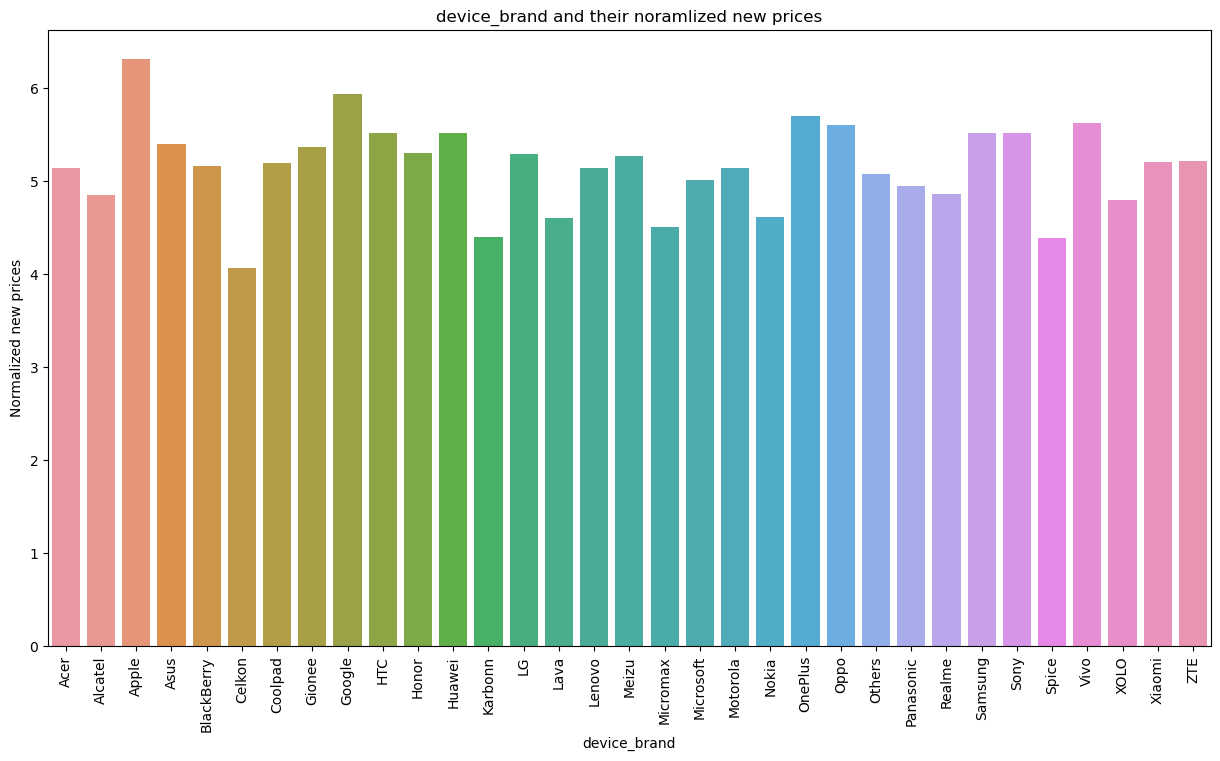

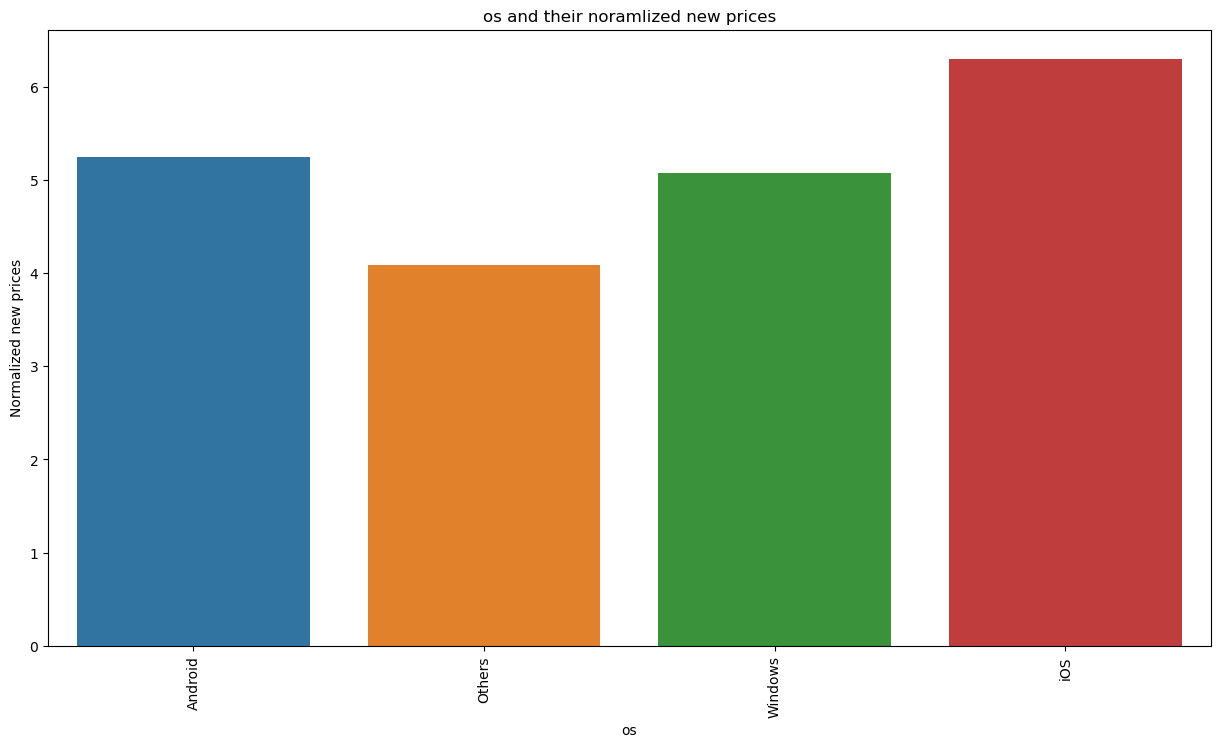

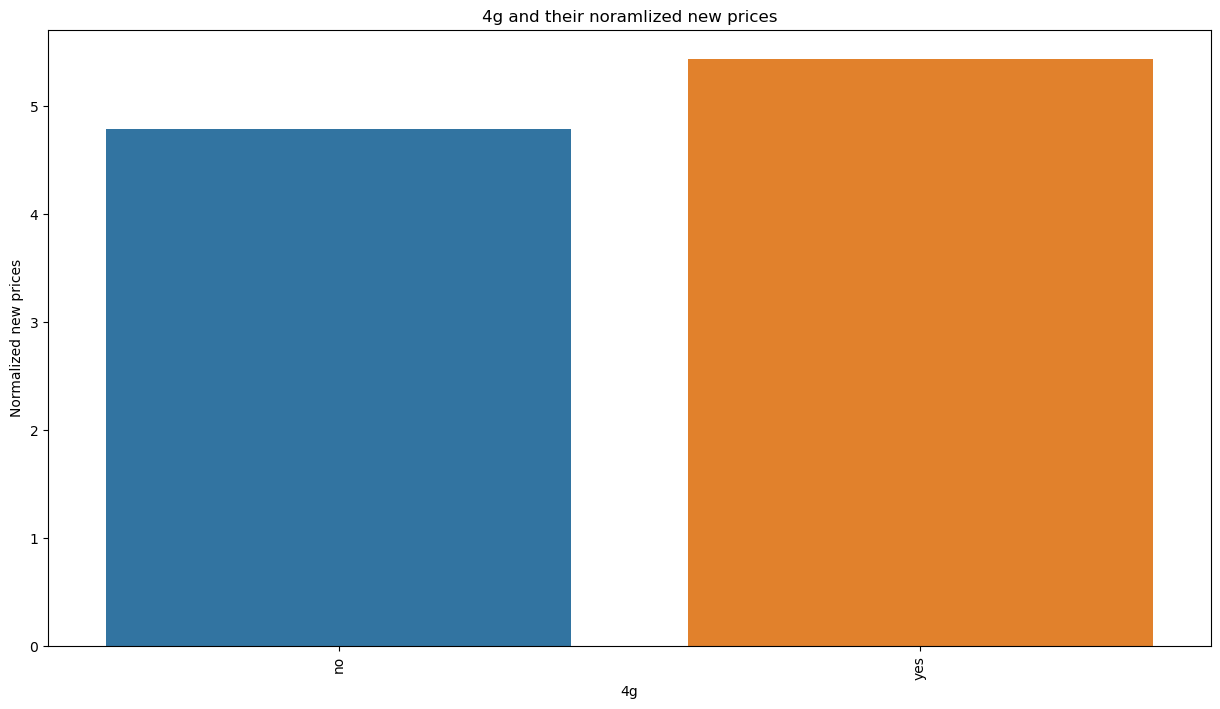

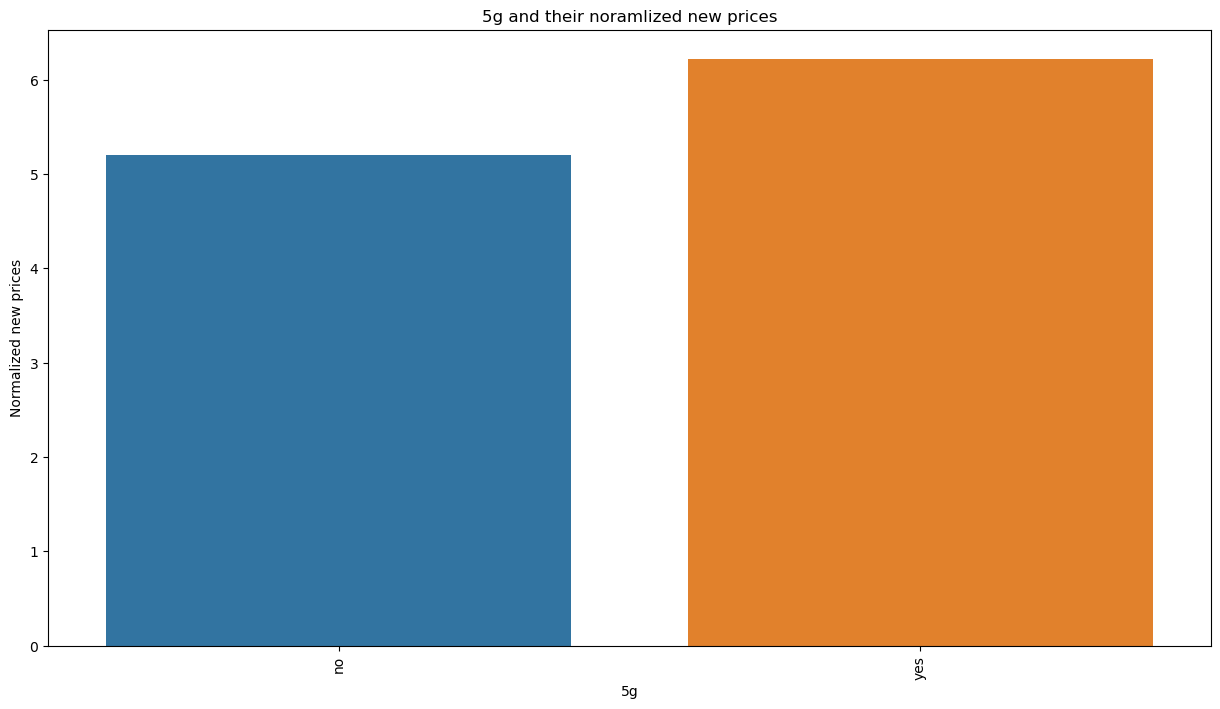

In [8]:
for col in cols:
    visualize(col)

<function matplotlib.pyplot.show(close=None, block=None)>

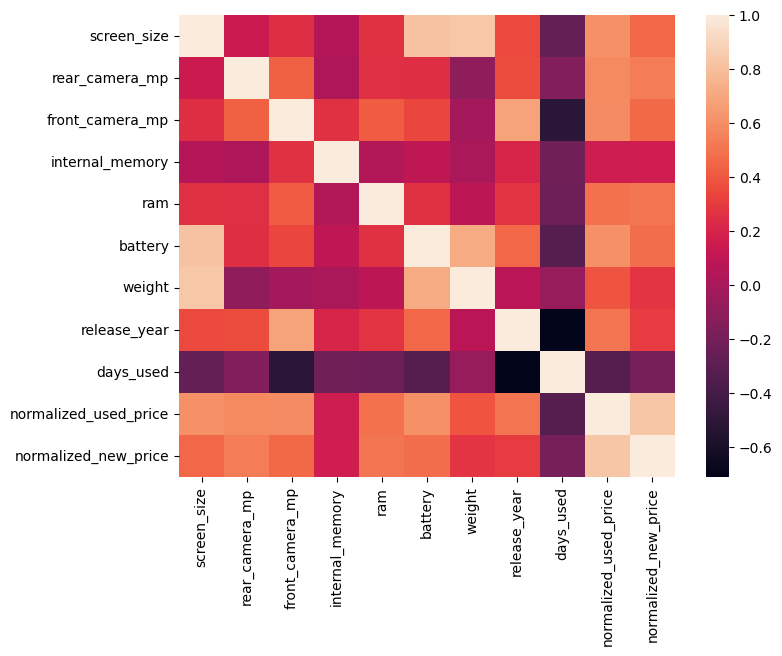

In [9]:
# Create a heatmap of features to see their correlation with one another
fig_dims = (8,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show

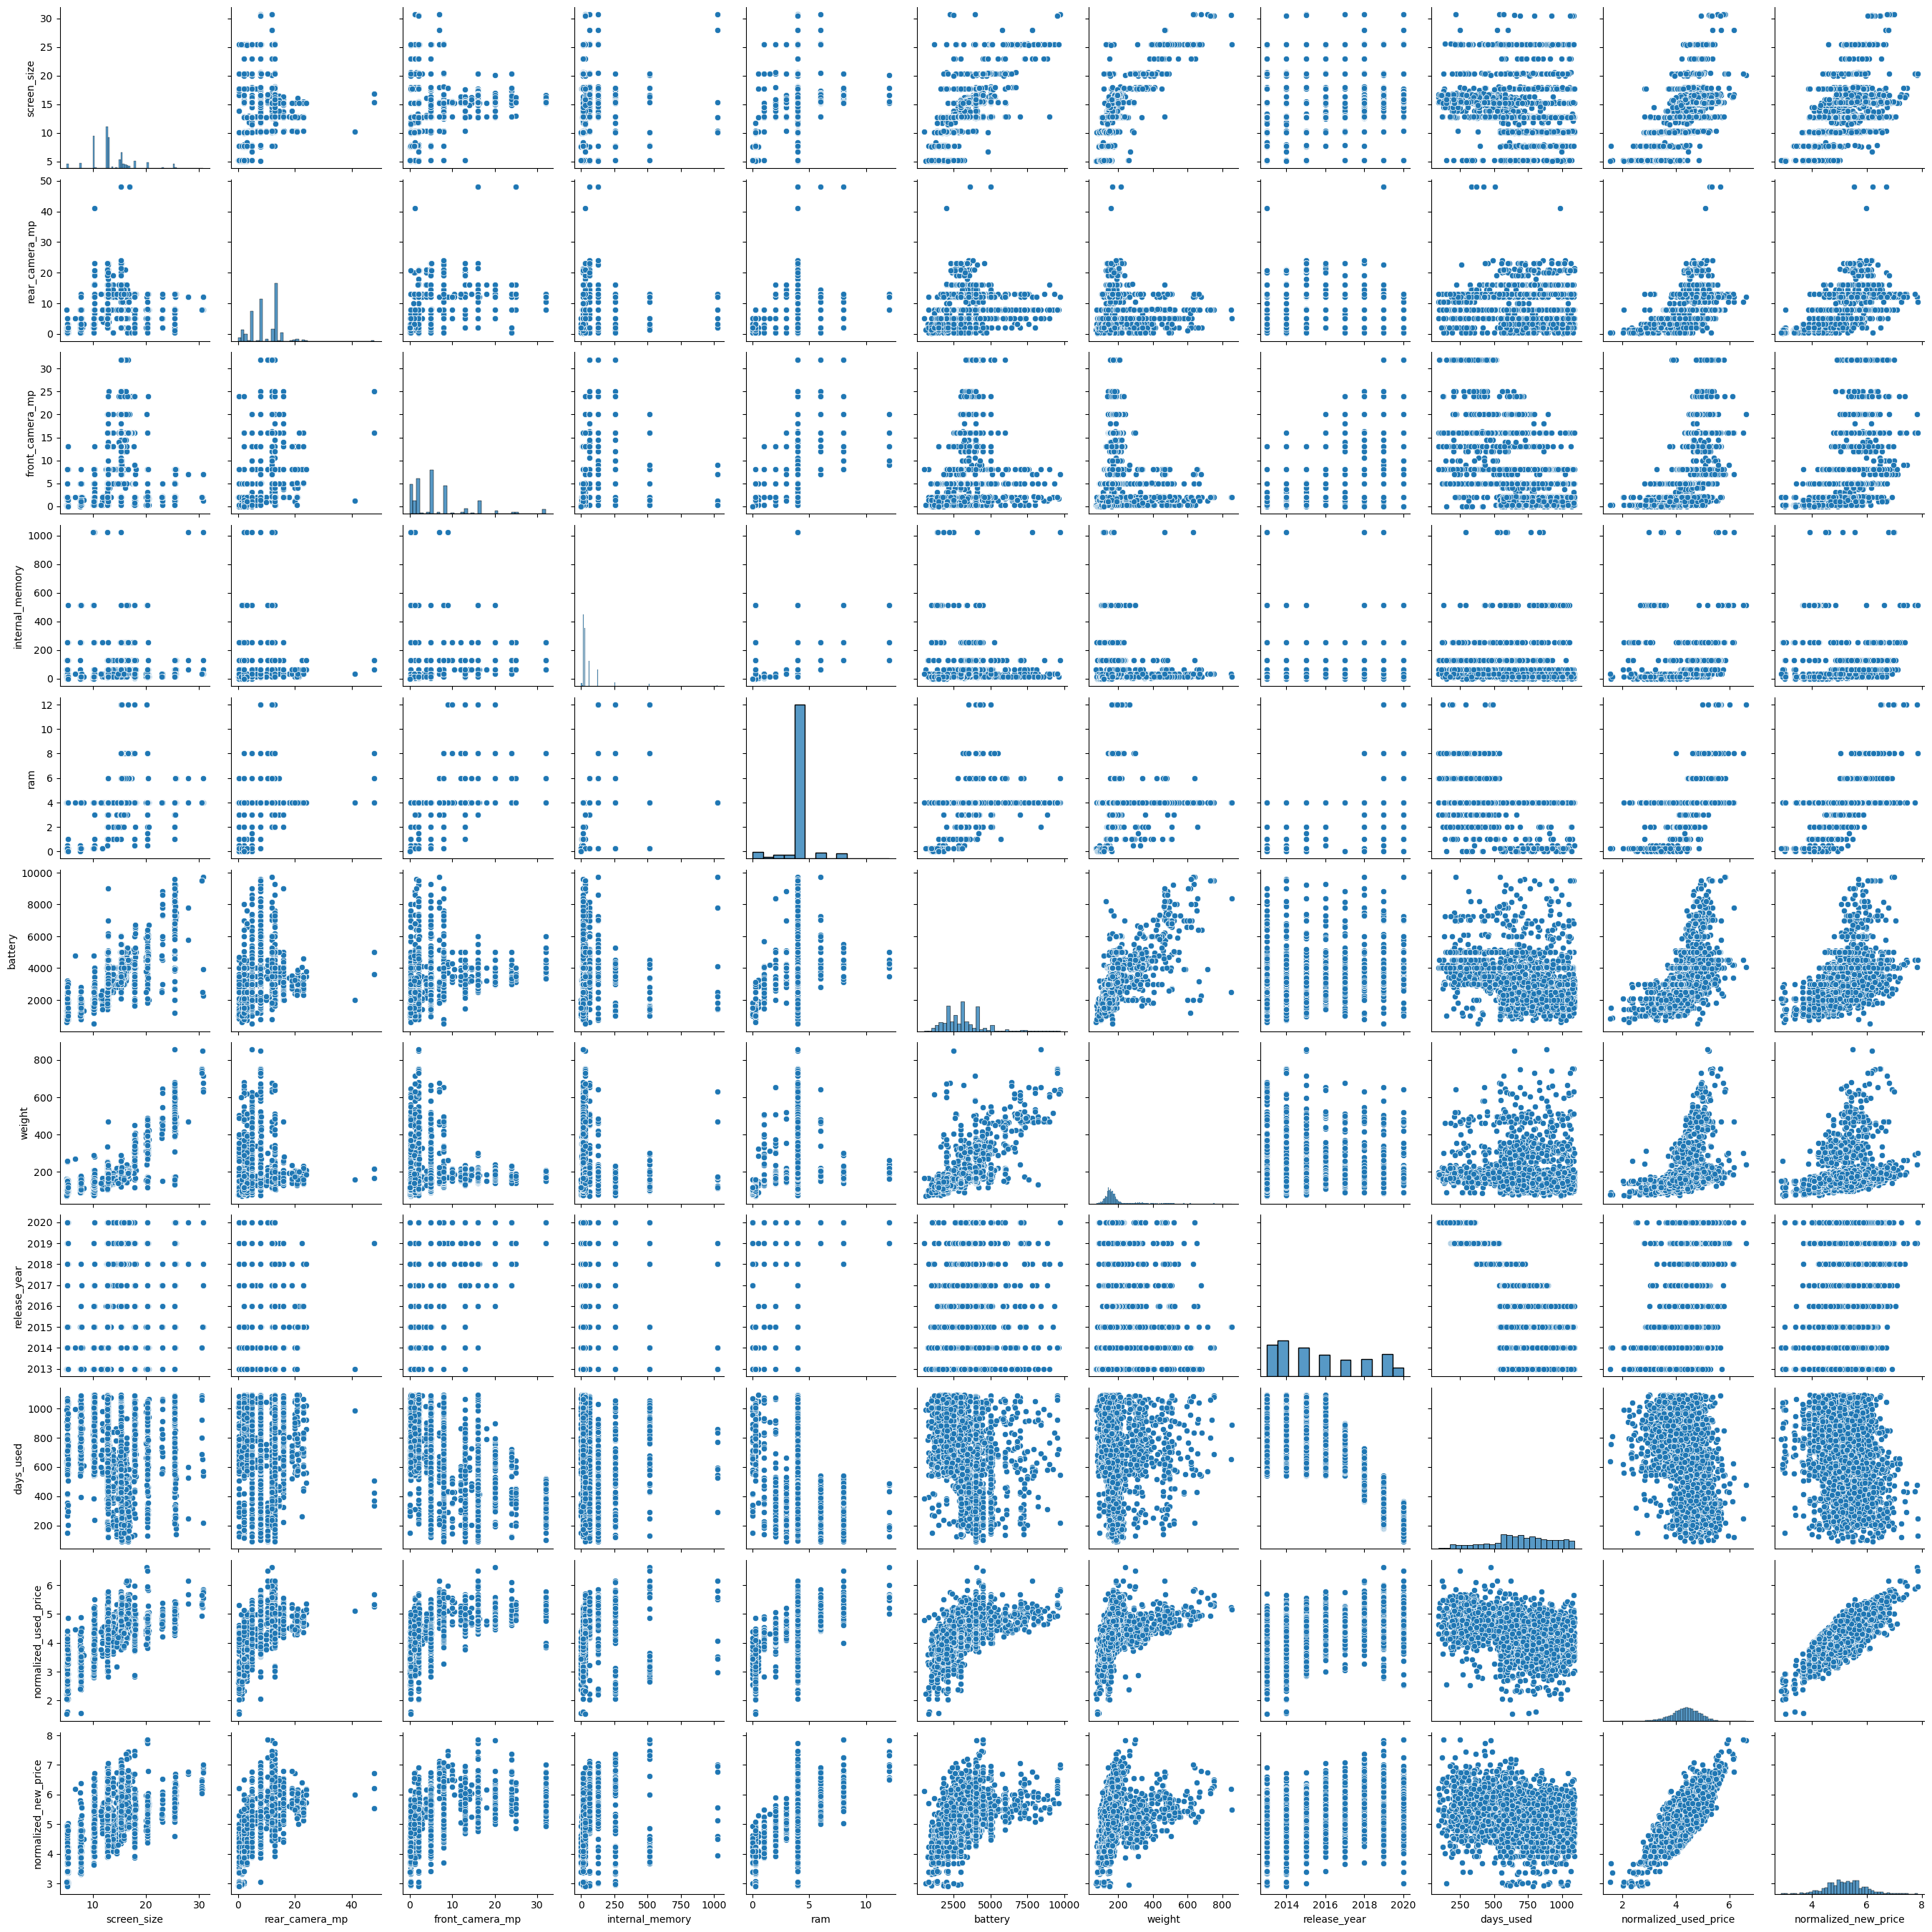

In [10]:
sns.pairplot(df)

## Creating machine learning models using Adaboost and DecisionTree regressors

In [12]:
# Using GridSearchCV to hyperparameter tune AdaBoost
ada = AdaBoostRegressor()

lr = [0.0001, 0.001]
loss = ['linear', 'square']
n_estimators = [50, 100]

param_grid = {'learning_rate': lr, 'loss': loss, 'n_estimators': n_estimators}

cv = GridSearchCV(ada, param_grid, cv=5)
cv.fit(X,y)


GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100]})

### Accuracy of Adaboost

In [13]:
# Gives accuracy of the AdaboostrRegressor
print(f"The accuracy of the model is: {cv.best_score_}")

The accuracy of the model is: 0.961703583244957


### Best parameters for the estimation in AdaBoost

In [14]:
# Best parameters for estimating the new prices
cv.best_params_

{'learning_rate': 0.001, 'loss': 'square', 'n_estimators': 100}

In [15]:
# Using GridSearchCV to hyperparameter tune AdaBoost
tree = DecisionTreeRegressor()

max_depth = [2,3,5]
criterion = ['squared_error', 'friedman_mse']
splitter = ['best', 'random']

param_grid = {'max_depth': max_depth, 'criterion': criterion, 'splitter': splitter}

cv2 = GridSearchCV(tree, param_grid, cv=5)
cv2.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 3, 5],
                         'splitter': ['best', 'random']})

### Accuracy of DecisionTree

In [16]:
# Gives accuracy of DecisionTreeRegressor
print(f"The accuracy of the model is: {cv2.best_score_}")

The accuracy of the model is: 0.9979683317386824


### Best parameters for the estimation in DecisionTree

In [17]:
# Best parameters for estimating the new prices
cv2.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'splitter': 'best'}

# From these, we see that the decision tree regressor with max_depth = 5 gives more accurate predictions (0.99) than Adaboost (0.96)